In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

/kaggle/input/lab4cleaned/lab4.xlsx


In [2]:
experimentalData = pd.read_excel('/kaggle/input/lab4cleaned/lab4.xlsx', header=0)
experimentalData.head(10)

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,...,Column 15,Column 16,Column 17,Column 18,Column 19,Column 20,Column 21,Column 22,Column 23,Column 24
0,549,3,378,1,406,0,423,0,440,3,...,538,1,452,0,508,0,469,0,498,0
1,549,3,378,1,405,2,420,1,438,3,...,538,2,450,0,506,0,468,0,497,0
2,548,4,377,2,405,1,419,2,436,4,...,535,1,450,1,504,1,466,0,494,0
3,545,4,377,3,404,2,417,2,435,5,...,534,3,448,1,503,0,464,0,493,0
4,547,5,376,3,403,3,415,3,432,4,...,533,2,446,1,500,4,463,1,491,0
5,545,5,375,3,404,2,414,3,432,6,...,530,4,445,0,498,2,461,0,489,0
6,542,10,373,5,402,4,412,4,428,6,...,528,3,436,3,497,0,459,0,487,1
7,351,199,229,148,270,134,321,95,340,96,...,473,24,290,51,494,2,452,14,480,17
8,276,272,190,187,203,200,207,210,216,220,...,239,101,114,111,477,52,376,235,399,254
9,276,272,189,186,203,199,206,210,216,219,...,138,135,113,111,383,322,338,344,359,365


In [3]:
trial_data = [] 

for i in range(1, 13):
    trial = {
        'movingDiskVelocity': experimentalData[f'Column {i * 2 - 1}'],
        'atRestDisk': experimentalData[f'Column {i * 2}']
    }
    trial_data.append(pd.DataFrame(trial))

trial_data[0]

,movingDiskVelocity,atRestDisk
0,549,3
1,549,3
2,548,4
3,545,4
4,547,5
5,545,5
6,542,10
7,351,199
8,276,272
9,276,272


Now, each element in trial_data is a trial, where one disk was spun, and the other was initially at rest. Black bar frequency was taken over 20 seconds. 

For each column, we transform black bar frequency to angular velocity w

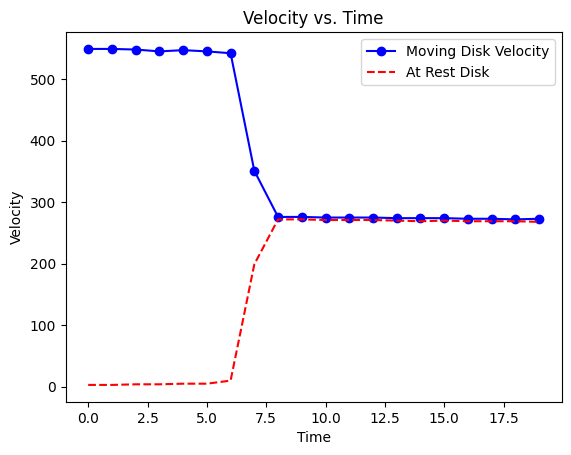

In [5]:
time = np.array([i for i in range(0, 20)])
y1 = np.array(trial_data[0].get('movingDiskVelocity'))
y2 = np.array(trial_data[0].get('atRestDisk'))

fig, ax = plt.subplots()

ax.plot(time, y1, 'bo-', label='Moving Disk Velocity')

ax.plot(time, y2, 'r--', label='At Rest Disk')

ax.set_xlabel('Time')
ax.set_ylabel('Velocity')
ax.set_title('Velocity vs. Time')
ax.legend()


plt.show()

We find the moment of collision
For every entry before this moment, those are the initial velocites.
For every moment after, those are the final velocities.

In [6]:
allowable_difference = 10  # Plus or minus 10
initial_moving_velocities = []  # initial movingDiskVelocities for each trial
final_moving_velocities = []  # final movingDiskVelocities for each trial
initial_at_rest_velocities = []  # initial atRestDiskVelocities for each trial
final_at_rest_velocities = []  # final atRestDiskVelocities for each trial

for trial in trial_data:
    moment_of_collision = None

    for i in range(len(trial)):
        moving_velocity = trial['movingDiskVelocity'].iloc[i]
        at_rest_velocity = trial['atRestDisk'].iloc[i]

        if abs(moving_velocity - at_rest_velocity) <= allowable_difference:
            moment_of_collision = i
            break  

    if moment_of_collision is not None:
        initial_moving_velocities.append(trial['movingDiskVelocity'].iloc[:moment_of_collision - 1])  
        final_moving_velocities.append(trial['movingDiskVelocity'].iloc[moment_of_collision:])
        initial_at_rest_velocities.append(trial['atRestDisk'].iloc[:moment_of_collision - 1])  
        final_at_rest_velocities.append(trial['atRestDisk'].iloc[moment_of_collision:])
    else:
        initial_moving_velocities.append([])
        final_moving_velocities.append([])
        initial_at_rest_velocities.append([])
        final_at_rest_velocities.append([])

print("Initial Moving Disk Velocities for the First Trial:", initial_moving_velocities[0])
print("Final Moving Disk Velocities for the First Trial:", final_moving_velocities[0])
print("Initial At Rest Disk Velocities for the First Trial:", initial_at_rest_velocities[0])
print("Final At Rest Disk Velocities for the First Trial:", final_at_rest_velocities[0])


Initial Moving Disk Velocities for the First Trial: 0    549
1    549
2    548
3    545
4    547
5    545
6    542
Name: movingDiskVelocity, dtype: int64
Final Moving Disk Velocities for the First Trial: 8     276
9     276
10    275
11    275
12    275
13    274
14    274
15    274
16    273
17    273
18    272
19    273
Name: movingDiskVelocity, dtype: int64
Initial At Rest Disk Velocities for the First Trial: 0     3
1     3
2     4
3     4
4     5
5     5
6    10
Name: atRestDisk, dtype: int64
Final At Rest Disk Velocities for the First Trial: 8     272
9     272
10    271
11    271
12    271
13    270
14    269
15    270
16    269
17    269
18    269
19    268
Name: atRestDisk, dtype: int64


In [14]:
from tabulate import tabulate

# means and SEM for initial moving disk velocities
initial_moving_means = [np.mean(velocities) for velocities in initial_moving_velocities]
initial_moving_sem = [round(np.std(velocities) / np.sqrt(len(velocities)), 1) for velocities in initial_moving_velocities]

# means and SEM for final moving disk velocities
final_moving_means = [round(np.mean(velocities), 1) for velocities in final_moving_velocities]
final_moving_sem = [round(np.std(velocities) / np.sqrt(len(velocities)), 1) for velocities in final_moving_velocities]

# means and SEM for initial at-rest disk velocities
initial_at_rest_means = [round(np.mean(velocities), 1) for velocities in initial_at_rest_velocities]
initial_at_rest_sem = [round(np.std(velocities) / np.sqrt(len(velocities)), 1) for velocities in initial_at_rest_velocities]

# means and SEM for final at-rest disk velocities
final_at_rest_means = [round(np.mean(velocities), 1) for velocities in final_at_rest_velocities]
final_at_rest_sem = [round(np.std(velocities) / np.sqrt(len(velocities)), 1) for velocities in final_at_rest_velocities]

# store results
data = {
    'Trial': list(range(1, 13)),
    'Initial Moving Mean': initial_moving_means,
    'Initial Moving SEM': initial_moving_sem,
    'Final Moving Mean': final_moving_means,
    'Final Moving SEM': final_moving_sem,
    'Initial At-Rest Mean': initial_at_rest_means,
    'Initial At-Rest SEM': initial_at_rest_sem,
    'Final At-Rest Mean': final_at_rest_means,
    'Final At-Rest SEM': final_at_rest_sem
}

results_table = pd.DataFrame(data)

# in LaTeX format
latex_table = tabulate(results_table, tablefmt='latex_raw', headers='keys', showindex=False)

# "Final Moving Mean" and "Final At-Rest Mean" -> single mean
results_table['Final Combined Mean'] = (results_table['Final Moving Mean'] + results_table['Final At-Rest Mean']) / 2

results_table['Final Combined SEM'] = results_table.apply(lambda row: round(np.sqrt((row['Final Moving SEM']**2 + row['Final At-Rest SEM']**2) / 2), 1), axis=1)

results_table['Initial Moving Mean'] = results_table['Initial Moving Mean'].apply(lambda x: round(x, 6))
results_table['Final Combined Mean'] = results_table['Final Combined Mean'].apply(lambda x: round(x, 6))

selected_columns = ['Trial', 'Initial Moving Mean', 'Initial Moving SEM', 'Final Combined Mean', 'Final Combined SEM']

selected_data = results_table[selected_columns]

latex_table = selected_data.to_latex(index=False, escape=False)

print(latex_table)

\begin{tabular}{rrrrr}
\toprule
Trial & Initial Moving Mean & Initial Moving SEM & Final Combined Mean & Final Combined SEM \\
\midrule
1 & 546.428571 & 0.900000 & 272.150000 & 0.400000 \\
2 & 376.285714 & 0.600000 & 186.600000 & 0.300000 \\
3 & 404.142857 & 0.500000 & 199.850000 & 0.300000 \\
4 & 417.142857 & 1.300000 & 206.950000 & 0.300000 \\
5 & 434.428571 & 1.400000 & 216.500000 & 0.300000 \\
6 & 448.714286 & 1.300000 & 222.600000 & 0.300000 \\
7 & 609.333333 & 7.600000 & 160.400000 & 0.400000 \\
8 & 526.125000 & 7.200000 & 135.500000 & 0.300000 \\
9 & 446.714286 & 1.900000 & 111.100000 & 0.300000 \\
10 & 498.555556 & 2.900000 & 365.200000 & 0.700000 \\
11 & 462.750000 & 1.800000 & 337.500000 & 0.700000 \\
12 & 491.125000 & 1.900000 & 358.750000 & 0.700000 \\
\bottomrule
\end{tabular}



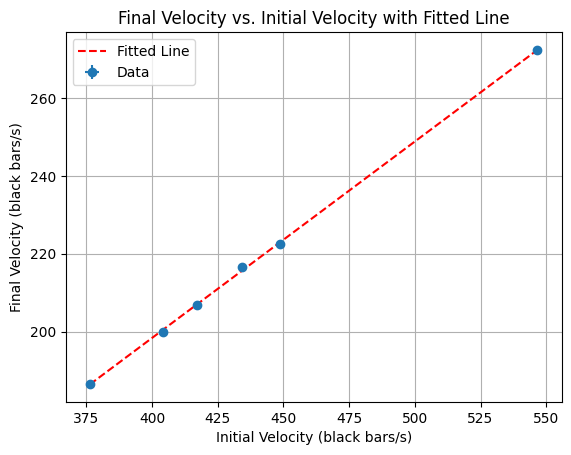

In [8]:
import numpy as np

# data in arrays
initial_velocity = np.array([546.4, 376.3, 404.1, 417.1, 434.4, 448.7])
final_velocity = np.array([272.2, 186.6, 199.9, 206.9, 216.5, 222.6])
initial_error = np.array([0.9, 0.6, 0.5, 1.3, 1.4, 1.3])
final_error = np.array([0.4, 0.3, 0.3, 0.3, 0.3, 0.3])

# function for the fit (linear)
def linear_function(x, a, b):
    return a * x + b

# fitting
popt, _ = curve_fit(linear_function, initial_velocity, final_velocity)
x_fit = np.linspace(min(initial_velocity), max(initial_velocity), 100)
y_fit = linear_function(x_fit, *popt)

plt.errorbar(initial_velocity, final_velocity, xerr=initial_error, yerr=final_error, marker='o', linestyle='none', label='Data')
plt.plot(x_fit, y_fit, 'r--', label='Fitted Line')
plt.xlabel('Initial Velocity (black bars/s)')
plt.ylabel('Final Velocity (black bars/s)')
plt.title('Final Velocity vs. Initial Velocity with Fitted Line')
plt.legend()
plt.grid()
plt.show()


Mean of Residuals: 0.0


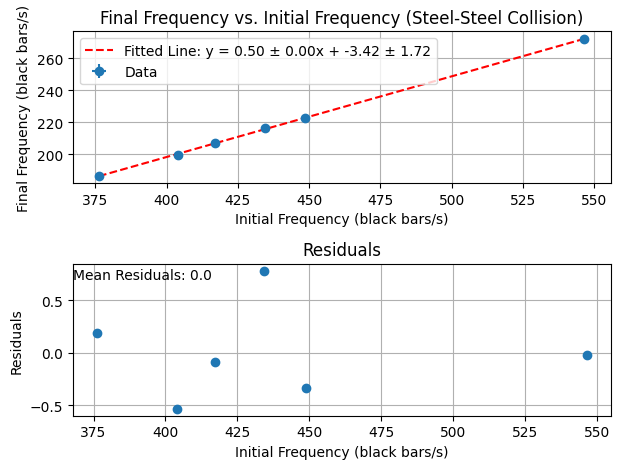

In [9]:
# plotting freqeuencies and residuals 
initial_velocity = np.array([546.4, 376.3, 404.1, 417.1, 434.4, 448.7])
final_velocity = np.array([272.2, 186.6, 199.9, 206.9, 216.5, 222.6])
initial_error = np.array([0.9, 0.6, 0.5, 1.3, 1.4, 1.3])
final_error = np.array([0.4, 0.3, 0.3, 0.3, 0.3, 0.3])

def linear_function(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear_function, initial_velocity, final_velocity)
perr = np.sqrt(np.diag(pcov))
x_fit = np.linspace(min(initial_velocity), max(initial_velocity), 100)
y_fit = linear_function(x_fit, *popt)

a, b = popt
std_a, std_b = perr 

fitted_equation = f'Fitted Line: y = {a:.2f} ± {std_a:.2f}x + {b:.2f} ± {std_b:.2f}'

residuals = final_velocity - linear_function(initial_velocity, *popt)

plt.subplot(2, 1, 1)
plt.errorbar(initial_velocity, final_velocity, xerr=initial_error, yerr=final_error, marker='o', linestyle='none', label='Data')
plt.plot(x_fit, y_fit, 'r--', label=fitted_equation)
plt.xlabel('Initial Frequency (black bars/s)')
plt.ylabel('Final Frequency (black bars/s)')
plt.title('Final Frequency vs. Initial Frequency (Steel-Steel Collision)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(initial_velocity, residuals, marker='o', linestyle='none', label='Residuals')
plt.xlabel('Initial Frequency (black bars/s)')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.grid()


mean_residuals = np.mean(residuals)

plt.annotate(f'Mean Residuals: {mean_residuals:.1f}', xy=(0, 0.9), xycoords='axes fraction')

print("Mean of Residuals:", round(mean_residuals, 1))

plt.tight_layout()
plt.savefig('figureSteelSteel.png')
plt.show()

In [12]:
# Moment of inertia calc
def moment(mass, radius):
    return 0.5 * mass * radius**2

momentAl = moment(0.505, (0.063))
momentSt = moment(1.34, 0.063 )
print (momentAl / (momentAl + momentSt))

0.27371273712737126


In [13]:
print(momentSt / (momentAl + momentSt))

0.7262872628726287
